<a href="https://colab.research.google.com/github/lcsbiffi/projetoTera_evasaoescolar/blob/main/Projeto_Tera_Evas%C3%A3o_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Projeto <font color="#62F41E">Tera</font> - Evasão Escolar</h1>

<HR>

[Adicionar depois]

Equipe:

Contexto do Problema:

Objetivos do Projeto:

**Problema**

Prever a evasão escolar e suas principais variáveis para que gestores escolares atuem ativamente em políticas de combate.


**Hipóteses**

1) As principais variáveis de evasão estão relacionadas a renda familiar.

2) A variável de transporte está diretamente relacionada à evasão.

3) Maternidade e paternidade na adolescência está entre as principais variáveis de evasão.

4) A falta de professores está relacionada a evasão.

## Bibliotecas

#### Instalando Novas Bibliotecas

In [1]:
!pip install missingno
!pip install sweetviz
!pip install matplotlib

#### Carregando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missing
import sweetviz as sv

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Base de Dados

[Falar um pouco sobre as Bases de Dados utilizadas]

In [3]:
ideb = pd.read_csv('.\Bases\IDEB\ideb_escola.csv')

In [4]:
inep = pd.read_csv('.\Bases\Indicadores Educacionais\indicadores_educacionais_escolas.csv')

In [5]:
inse_2019 = pd.read_excel('.\Bases\Indicadores Educacionais\indicadores_educacionais_INSE_2019.xlsx')

In [6]:
censo = pd.read_csv('.\Bases\Censo Escolar\censo_escola.csv')

<ipython-input-6-52ae7d4b1d61>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  censo = pd.read_csv('.\Bases\Censo Escolar\censo_escola.csv')


## Analisando as Bases de Dados

<HR>

### IDEB

<HR>

Sobre o IDEB:

O Índice de Desenvolvimento da Educação Básica (Ideb) foi criado em 2007 e reúne, em um só indicador, os resultados de dois conceitos igualmente importantes para a qualidade da educação: o fluxo escolar e as médias de desempenho nas avaliações.

Ele é calculado a partir dos dados sobre aprovação escolar, obtidos no Censo Escolar, e das médias de desempenho nas avaliações do Inep, o Sistema de Avaliação da Educação Básica (Saeb) – para as unidades da federação e para o país, e a Prova Brasil – para os municípios.

*O Ideb é resultado do produto entre o desempenho e o rendimento escolar (ou o inverso do tempo médio de conclusão de uma série) então ele pode ser interpretado da seguinte maneira: para uma escola A cuja média padronizada da Prova Brasil, 4ª série, é 5,0 e o tempo médio de conclusão de cada série é de 2 anos, a rede/ escola terá o Ideb igual a 5,0 multiplicado por 1/2, ou seja, Ideb = 2,5. Já uma escola B com média padronizada da Prova Brasil, 4ª série, igual a 5,0 e tempo médio para conclusão igual a 1 ano, terá Ideb = 5,0.

A forma geral do Ideb é dada por:
IDEBji = Nji Pji;

em que,
i = ano do exame (Saeb e Prova Brasil) e do Censo Escolar;
N ji = média da proficiência em Língua Portuguesa e Matemática, padronizada para um indicador entre 0 e 10, dos alunos da unidade j, obtida em determinada edição do exame realizado ao final da etapa de ensino;
P ji = indicador de rendimento baseado na taxa de aprovação da etapa de ensino dos alunos da unidade j;

 O índice varia de zero a 10 e a combinação entre fluxo e aprendizagem tem o mérito de equilibrar as duas dimensões: se um sistema de ensino retiver seus alunos para obter resultados de melhor qualidade no Saeb ou Prova Brasil, o fator fluxo será alterado, indicando a necessidade de melhoria do sistema. Se, ao contrário, o sistema apressar a aprovação do aluno sem qualidade, o resultado das avaliações indicará igualmente a necessidade de melhoria do sistema.
 
 O Ideb também é importante por ser condutor de política pública em prol da qualidade da educação. É a ferramenta para acompanhamento das metas de qualidade do Plano de Desenvolvimento da Educação (PDE) para a educação básica, que tem estabelecido, como meta, que em 2022 o Ideb do Brasil seja 6,0 – média que corresponde a um sistema educacional de qualidade comparável a dos países desenvolvidos.


**Legenda**

*ano* - Ano

*sigla-uf* - Sigla da Unidade da Federação

*id_município* - ID Município - IBGE 7 Dígitos

*id_escola* - ID Escola

*rede* - Rede Escolar

*ensino* - Tipo de Ensino (fundamental ou médio)

*anos_escolares* - Anos escolares (Iniciais (1-5), Finais (6-9), Todos (1-4) <- Ensino Médio)

*taxa_aprovação* - Taxa de Aprovação (0 a 100) => Obtido no Censo Escolar

*indicador_rendimento* - Indicador de Rendimento (P)

*nota_saeb_matematica* - Nota SAEB - Matemática

*nota_saeb_lingua_portuguesa* - Nota SAEB - Português

*nota_saeb_media_padronizada* - Nota SAEB - Média Padronizada (N)

*ideb* - IDEB (Média Padronizada (N) X Indicador de Rendimento (P)

*projecao* - Projeção (acho que tem relação com a meta de projeção que eles colocam para cada escola)

In [7]:
ideb.head()

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200013,12008966,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,AC,1200013,12008966,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,AC,1200013,12009156,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,AC,1200013,12009156,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,AC,1200013,12009164,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027767 entries, 0 to 1027766
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   ano                          1027767 non-null  int64  
 1   sigla_uf                     1027767 non-null  object 
 2   id_municipio                 1027767 non-null  int64  
 3   id_escola                    1027767 non-null  int64  
 4   rede                         1027767 non-null  object 
 5   ensino                       1027767 non-null  object 
 6   anos_escolares               1027767 non-null  object 
 7   taxa_aprovacao               619628 non-null   float64
 8   indicador_rendimento         619580 non-null   float64
 9   nota_saeb_matematica         488139 non-null   float64
 10  nota_saeb_lingua_portuguesa  488139 non-null   float64
 11  nota_saeb_media_padronizada  556480 non-null   float64
 12  ideb                         556306 non-nu

Temos valores NaN nas seguintes colunas:

- taxa_aprovacao
- indicador_rendimento
- nota_saeb_matematica
- nota_saeb_lingua_portuguesa
- nota_saeb_media_padronizada
- ideb 
- projecao

In [9]:
ideb.describe(include = 'all').round(1)

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
count,1027767.0,1027767,1027767.0,1027767.0,1027767,1027767,1027767,619628.0,619580.0,488139.0,488139.0,556480.0,556306.0,705363.0
unique,NaN,27,NaN,NaN,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SP,NaN,NaN,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,130434,NaN,NaN,645582,965727,559242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.4,NaN,3088825.9,30875714.7,NaN,NaN,NaN,86.7,0.9,222.2,211.5,5.0,4.4,4.7
std,5.2,NaN,995739.8,9926413.0,NaN,NaN,NaN,11.4,0.1,34.8,37.5,0.9,1.2,1.1
min,2005.0,NaN,1100015.0,11000058.0,NaN,NaN,NaN,0.0,0.0,99.9,103.7,1.4,0.1,0.6
25%,2009.0,NaN,2311306.0,23197269.0,NaN,NaN,NaN,80.5,0.8,196.1,181.7,4.4,3.6,3.9
50%,2013.0,NaN,3114402.0,31044164.0,NaN,NaN,NaN,89.5,0.9,223.9,212.6,4.9,4.3,4.7
75%,2017.0,NaN,3550308.0,35436690.0,NaN,NaN,NaN,95.7,1.0,246.6,239.0,5.6,5.2,5.4


In [10]:
ideb_anos = ideb['ano'].value_counts(sort = False)
print(ideb_anos)

2005    107303
2007    107303
2009    107303
2011    107303
2013    107303
2015    107303
2017    127983
2019    127983
2021    127983
Name: ano, dtype: int64


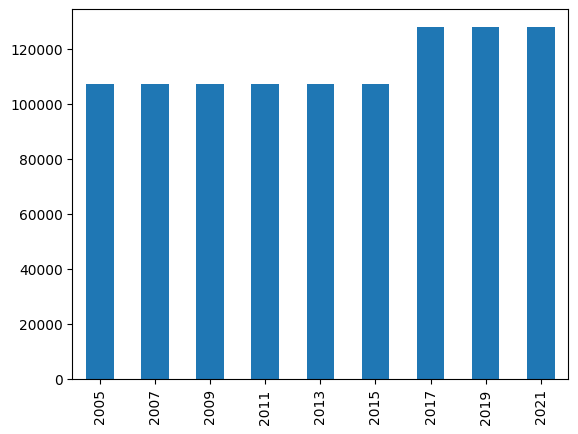

In [11]:
#Plotando um gráfico ao longo dos anos

ideb.ano.value_counts(sort = False).plot(kind = 'bar')
plt.show()

Os dados são apresentados de 2 em 2 anos como pode ser observado. A partir de 2017 tem um acréscimo na quantidade de valores.

In [12]:
ideb_ensino = ideb['ensino'].value_counts(normalize=True)*100
print(ideb_ensino)

fundamental    93.963612
medio           6.036388
Name: ensino, dtype: float64


In [13]:
ideb_anos_escolares = ideb['anos_escolares'].value_counts()
print(ideb_anos_escolares)

iniciais (1-5)    559242
finais (6-9)      406485
todos (1-4)        62040
Name: anos_escolares, dtype: int64


Maioria das observações (93%) são de *turmas do Ensino Fundamental*

In [14]:
ideb.loc[ideb['anos_escolares'] == 'todos (1-4)'].head(50)

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
643828,2017,AC,1200013,12018422,estadual,medio,todos (1-4),89.7,0.894401,270.64,258.95,4.367425,3.9,NaN
643829,2017,AC,1200013,12021768,estadual,medio,todos (1-4),74.6,0.753821,NaN,NaN,NaN,NaN,NaN
643835,2017,AC,1200013,12128236,estadual,medio,todos (1-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN
643839,2017,AC,1200054,12015946,estadual,medio,todos (1-4),82.9,0.836626,NaN,NaN,NaN,NaN,NaN
643845,2017,AC,1200104,12016284,estadual,medio,todos (1-4),95.3,0.958307,264.76,272.42,4.486338,4.3,NaN
643851,2017,AC,1200104,12017027,estadual,medio,todos (1-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN
643855,2017,AC,1200104,12026948,estadual,medio,todos (1-4),91.0,0.892747,267.50,261.42,4.360010,3.9,NaN
643860,2017,AC,1200138,12009369,estadual,medio,todos (1-4),96.2,0.963686,272.98,258.32,4.390859,4.2,NaN
643869,2017,AC,1200179,12009725,estadual,medio,todos (1-4),84.6,0.866252,NaN,NaN,NaN,NaN,NaN
643875,2017,AC,1200179,12023396,estadual,medio,todos (1-4),86.4,0.871753,NaN,NaN,NaN,NaN,NaN


Confirmando aqui que o valor *todos (1-4)* da coluna *anos_escolares* se refere ao **ensino médio**

Analisando a base por estado:

In [15]:
ideb['sigla_uf'].value_counts()

SP    130434
MG     99678
BA     91995
RS     70107
MA     62844
CE     61152
RJ     57183
PA     54213
PR     47964
PE     47484
SC     39036
GO     32241
PI     30117
PB     27693
AM     23148
RN     21585
MT     20739
AL     19974
ES     18351
SE     14583
MS     14148
TO     12486
RO     10698
DF      6105
AC      5202
AP      4869
RR      3738
Name: sigla_uf, dtype: int64

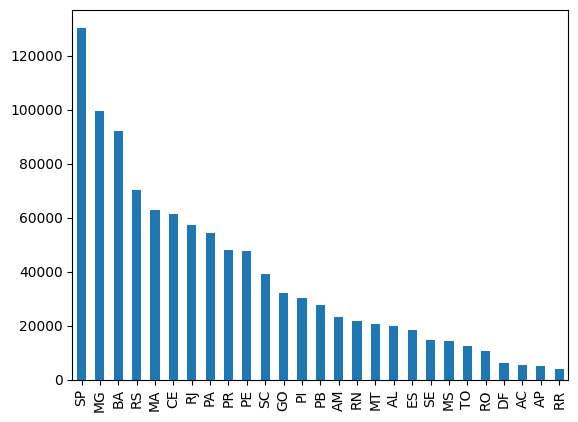

In [16]:
ideb.sigla_uf.value_counts().sort_values(ascending = False).plot(kind = 'bar', )
plt.show()

SP tem a maior quantidade de Dados.

**% de nulos por estado:**

In [48]:
ideb_null_estados = ideb.groupby('sigla_uf')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)


print(ideb_null_estados.sort_values(ascending = False))

sigla_uf
RR    65.28
MA    62.24
PI    62.10
PA    61.28
BA    59.16
AM    58.68
AP    58.31
AC    56.65
PB    56.59
RN    56.57
SE    56.30
CE    56.03
AL    54.60
MT    53.77
TO    53.48
PE    52.77
RO    51.89
RS    51.78
RJ    48.67
GO    47.81
SC    47.76
ES    47.11
MS    46.97
SP    46.56
DF    46.42
MG    44.77
PR    43.77
Name: nota_saeb_lingua_portuguesa, dtype: float64


SP é um dos estados com menor quantidade de nulos.

**% nulos por ano:**

In [54]:
ideb_null_anos = ideb.groupby('ano')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_null_anos.sort_values(ascending = False))

ano
2015    100.00
2021    100.00
2005     56.57
2017     40.10
2007     39.97
2013     34.93
2019     34.40
2011     33.60
2009     29.71
Name: nota_saeb_lingua_portuguesa, dtype: float64


In [51]:
ideb_null_anos2 = ideb.groupby('ano')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().sum())

print(ideb_null_anos2.sort_values(ascending = False))

ano
2021    127983
2015    107303
2005     60704
2017     51320
2019     44025
2007     42887
2013     37478
2011     36051
2009     31877
Name: nota_saeb_lingua_portuguesa, dtype: int64


Confirmando que os anos de 2021 e 2015 não tem dados na base do IDEB, fortes indícios que devemos dropar essas colunas!

**%de nulos por tipo de ensino:**

In [56]:
ideb_null_ensino = ideb.groupby('ensino')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_null_ensino.sort_values(ascending = False))

ensino
medio          65.05
fundamental    51.70
Name: nota_saeb_lingua_portuguesa, dtype: float64


In [57]:
ideb['ensino'].value_counts()

fundamental    965727
medio           62040
Name: ensino, dtype: int64

Medio tem um pouco mais de dados faltantes do que o fundamental e menor quantidade de dados.

**%de nulos por tipo de rede:**

In [58]:
ideb_null_rede = ideb.groupby('rede')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_null_rede.sort_values(ascending = False))

rede
privada      77.13
federal      70.16
municipal    53.66
estadual     50.18
Name: nota_saeb_lingua_portuguesa, dtype: float64


In [59]:
ideb['rede'].value_counts()

municipal    645582
estadual     376350
privada        3747
federal        2088
Name: rede, dtype: int64

Provavelmente, teremos que excluir os dados da rede privada! [Não é nosso objeto de estudo]

A Federal tem mais dados nulos.

**%de nulos por anos_escolares:**

In [60]:
ideb_null_anos_escolares = ideb.groupby('anos_escolares')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_null_anos_escolares.sort_values(ascending = False))

anos_escolares
todos (1-4)       65.05
finais (6-9)      52.08
iniciais (1-5)    51.42
Name: nota_saeb_lingua_portuguesa, dtype: float64


"todos (1-4)" tem a mesma % de nulos para o ensino medio, pois significam a mesma coisa.

### Realizando o recorte na base para o estado de São Paulo (SP) e Ensino Médio

In [17]:
colunas = ['taxa_aprovacao', 'indicador_rendimento', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'nota_saeb_media_padronizada', 'ideb']
ideb_SP = ideb.loc[ideb['sigla_uf'] == "SP"]
ideb_SP[colunas].describe().round(1)

,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
count,88752.0,88750.0,69704.0,69704.0,80440.0,80432.0
mean,94.1,0.9,236.4,225.2,5.5,5.2
std,5.8,0.1,28.9,33.6,0.9,1.0
min,0.0,0.1,131.8,122.2,2.4,0.6
25%,91.5,0.9,217.8,199.2,4.8,4.4
50%,95.8,1.0,237.7,226.4,5.3,5.1
75%,98.4,1.0,255.1,248.3,6.1,5.9
max,100.0,1.0,432.7,377.8,9.1,9.0


In [18]:
ideb_SP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130434 entries, 92937 to 1026180
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          130434 non-null  int64  
 1   sigla_uf                     130434 non-null  object 
 2   id_municipio                 130434 non-null  int64  
 3   id_escola                    130434 non-null  int64  
 4   rede                         130434 non-null  object 
 5   ensino                       130434 non-null  object 
 6   anos_escolares               130434 non-null  object 
 7   taxa_aprovacao               88752 non-null   float64
 8   indicador_rendimento         88750 non-null   float64
 9   nota_saeb_matematica         69704 non-null   float64
 10  nota_saeb_lingua_portuguesa  69704 non-null   float64
 11  nota_saeb_media_padronizada  80440 non-null   float64
 12  ideb                         80432 non-null   float64

In [19]:
ideb_SP.isnull().sum()

ano                                0
sigla_uf                           0
id_municipio                       0
id_escola                          0
rede                               0
ensino                             0
anos_escolares                     0
taxa_aprovacao                 41682
indicador_rendimento           41684
nota_saeb_matematica           60730
nota_saeb_lingua_portuguesa    60730
nota_saeb_media_padronizada    49994
ideb                           50002
projecao                       37102
dtype: int64

In [20]:
ideb_SP.isnull().mean().round(4)*100

ano                             0.00
sigla_uf                        0.00
id_municipio                    0.00
id_escola                       0.00
rede                            0.00
ensino                          0.00
anos_escolares                  0.00
taxa_aprovacao                 31.96
indicador_rendimento           31.96
nota_saeb_matematica           46.56
nota_saeb_lingua_portuguesa    46.56
nota_saeb_media_padronizada    38.33
ideb                           38.34
projecao                       28.45
dtype: float64

Os dados nulos estão em grande % nesse Dataset, chegando a quase metade. Logo, deve-se olhar para esses nulos e seu preenchimento com mais cautela.

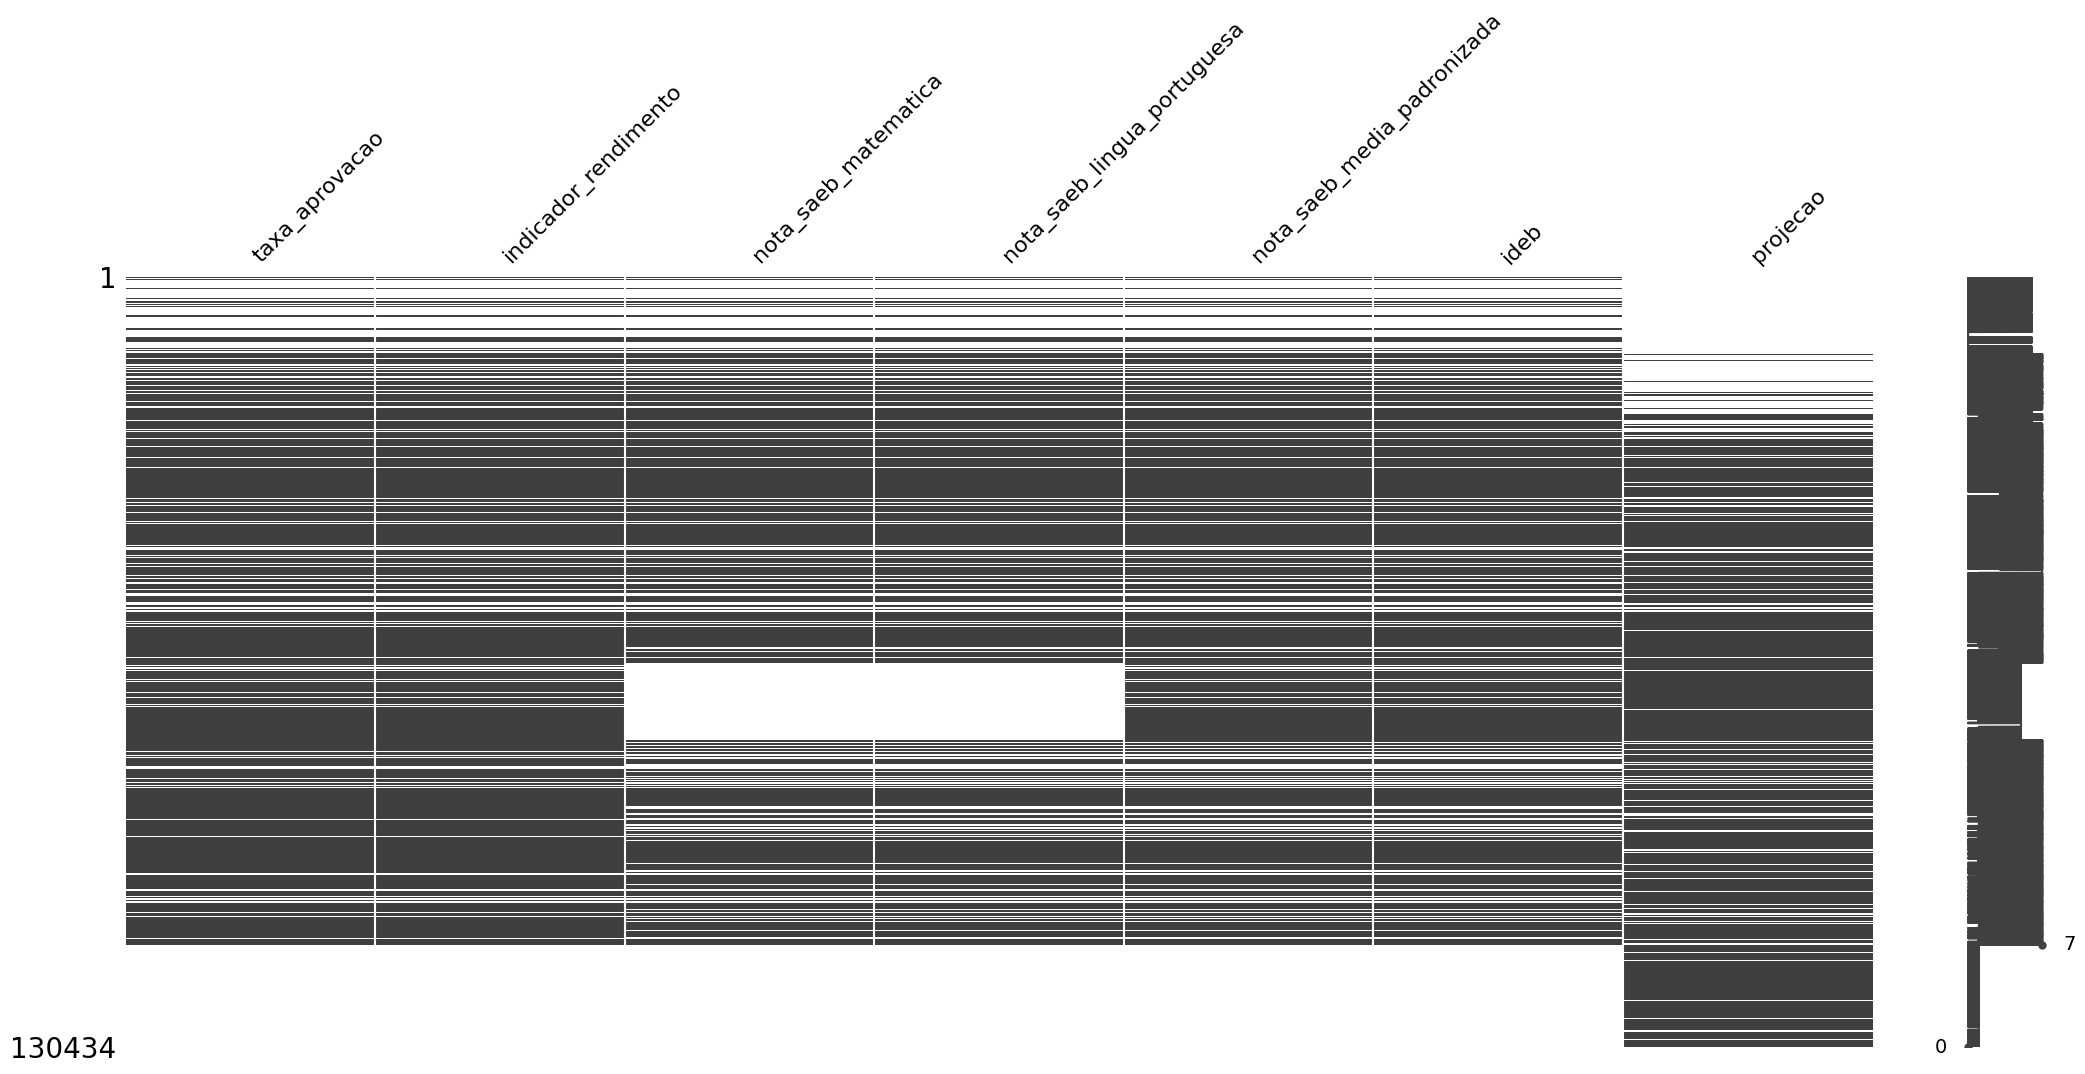

In [21]:
#Aplicando uma bibloteca para visualizar melhor a localização dos dados nulos.

missing.matrix(ideb_SP[ideb_SP.columns[ideb_SP.isnull().any()]])
plt.show()

Os dados faltantes estam na mesma linha, ou seja, não há dados da prova para estes casos. Vamos fazer o recorte para o Ensino Médio para enxergar melhor.

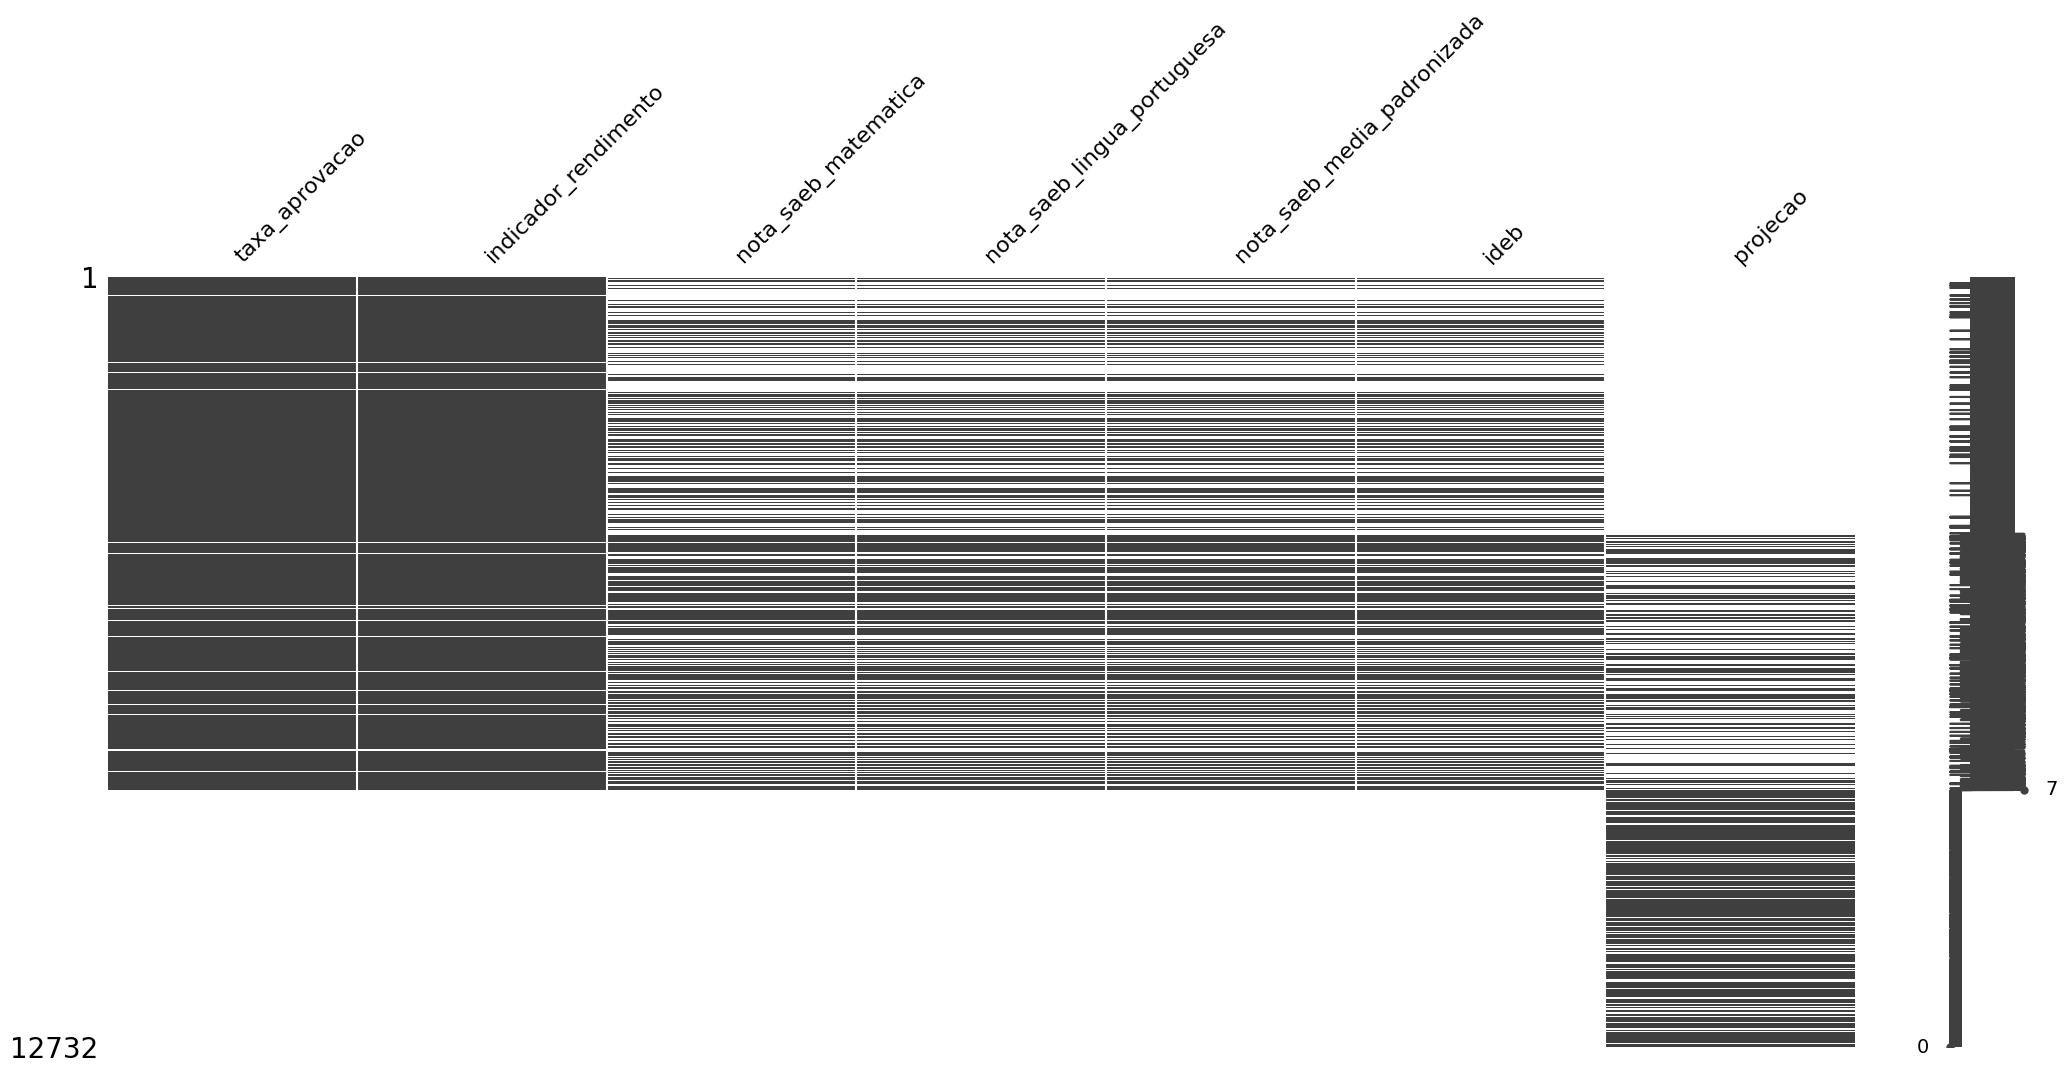

In [22]:
ideb_SP2 = ideb_SP.loc[ideb_SP['ensino'] == 'medio']

missing.matrix(ideb_SP2[ideb_SP2.columns[ideb_SP2.isnull().any()]])
plt.show()

Calculando a % de dados faltantes para a segmentação de SP ensino médio.

In [23]:
ideb_SP2.isnull().mean().round(4)*100

ano                             0.00
sigla_uf                        0.00
id_municipio                    0.00
id_escola                       0.00
rede                            0.00
ensino                          0.00
anos_escolares                  0.00
taxa_aprovacao                 36.37
indicador_rendimento           36.37
nota_saeb_matematica           63.57
nota_saeb_lingua_portuguesa    63.57
nota_saeb_media_padronizada    63.57
ideb                           63.57
projecao                       59.53
dtype: float64

A proporção de nulos aumentou, devemos pensar o que fazer com isso!

Comentário (Liz): Eu não faria a substituição por médias agora, tentaria ver a similaridade entre as escolas e substituiria por cluster. Exemplo: escolas rurais, localizadas em município tal, com x estrutura tem a média nas notas X. Então, substituiria com base nisso.

**Aprofundando um pouco mais na questão dos nulos:**

% de nulos por ano:

In [52]:
ideb_SP2_null_anos = ideb_SP2.groupby('ano')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_SP2_null_anos.sort_values(ascending = False))

ano
2021    100.00
2017     56.17
2019     34.54
Name: nota_saeb_lingua_portuguesa, dtype: float64


Verificando se só tem os anos de 2017 e 2019 na base de fato...

In [61]:
ideb_SP2_null_anos2 = ideb_SP2.groupby('ano')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().sum())

print(ideb_SP2_null_anos2.sort_values(ascending = False))

ano
2021    4244
2017    2384
2019    1466
Name: nota_saeb_lingua_portuguesa, dtype: int64


In [53]:
ideb_SP2['ano'].value_counts()

2017    4244
2019    4244
2021    4244
Name: ano, dtype: int64

=> **1º Conclusão**: A Base do IDEB segmentada para o Estado de São Paulo e Ensino Médio só tem dados de duas edições, ano de 2017 e 2019.

**%de nulos por tipo de rede:**

In [63]:
ideb_SP2_null_rede = ideb_SP2.groupby('rede')['nota_saeb_lingua_portuguesa'].apply(lambda x: x.isnull().mean().round(4)*100)

print(ideb_SP2_null_rede.sort_values(ascending = False))

rede
federal      80.65
privada      74.81
municipal    63.28
estadual     62.80
Name: nota_saeb_lingua_portuguesa, dtype: float64


In [64]:
ideb_SP2['rede'].value_counts()

estadual     11787
privada        675
municipal      177
federal         93
Name: rede, dtype: int64

## Excluindo Dados

Devemos excluir:
    
    - Escolas da rede particular.
    - Ano de 2021
    - Coluna de Projecao

In [66]:
#Excluindo escolas da rede privada
ideb_SP2_tratada = ideb_SP2[ideb_SP2.rede != "privada"]

#Conferindo a exclusão
ideb_SP2_tratada['rede'].value_counts()

estadual     11787
municipal      177
federal         93
Name: rede, dtype: int64

In [67]:
#Excluindo dados com o ano de 2021
ideb_SP2_tratada = ideb_SP2_tratada[ideb_SP2_tratada.ano != 2021]

#Conferindo a exclusão
ideb_SP2_tratada['ano'].value_counts()

2017    4019
2019    4019
Name: ano, dtype: int64

In [68]:
# Excluindo a coluna projecao
ideb_SP2_tratada = ideb_SP2_tratada.drop('projecao', axis=1)

#Conferindo a exclusão
ideb_SP.head()

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
92937,2005,SP,3500105,35030806,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN
92938,2005,SP,3500105,35031045,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN
92939,2005,SP,3500105,35031112,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN
92940,2005,SP,3500105,35079911,municipal,fundamental,iniciais (1-5),90.5,0.901503,184.16,177.78,4.711114,4.2
92941,2005,SP,3500105,35079923,municipal,fundamental,iniciais (1-5),94.2,0.939028,171.97,168.77,4.314822,4.1


## Compreendendo as correlações - IDEB

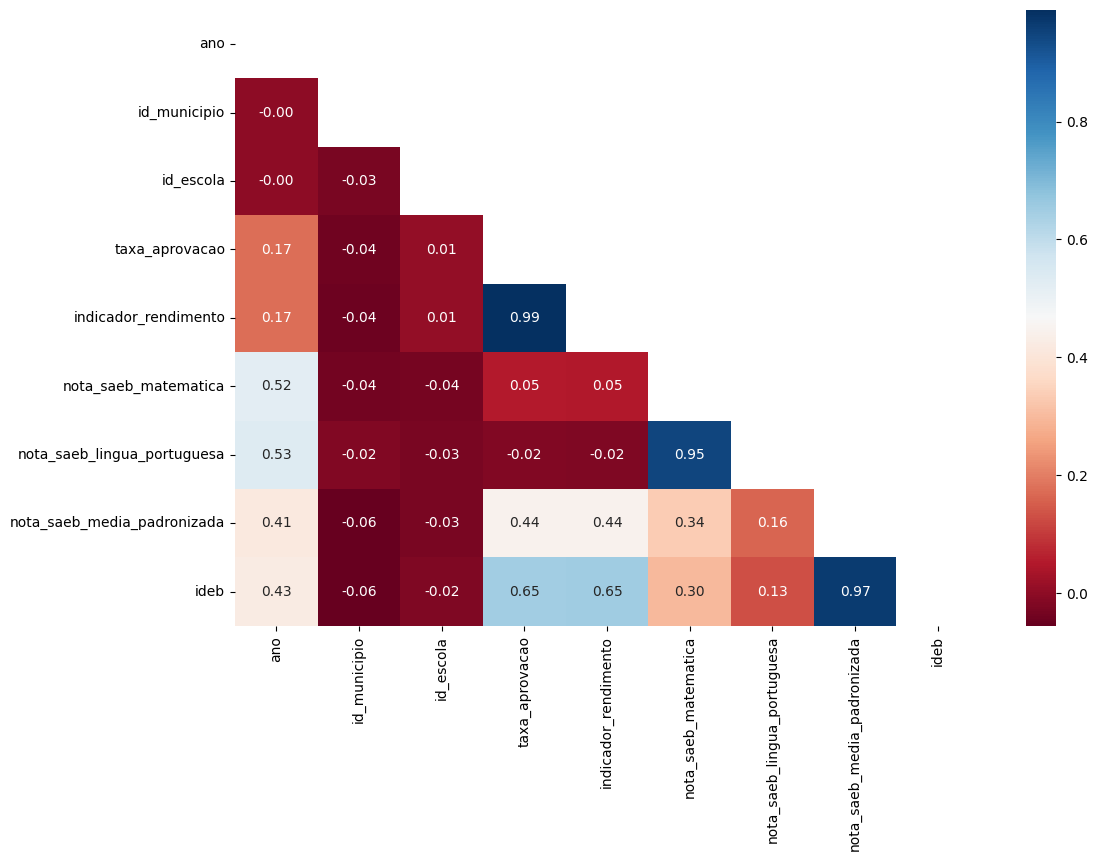

In [34]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números

sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    ideb_SP.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(ideb_SP.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

As notas de matemática e português tem uma forte correlação, porque? => Estudar isso

***Comentário:***

Devemos explorar um pouco mais essa base do IDEB, tentar entender o porquê das correlações.

[Liz] continuar aqui entendendo um pouco mais das correlações da base do IDEB entre si e com outras variáveis de outras bases. Principalmente, a target.

<HR>

## INSE

<HR>

#### LEGENDA

**COLUNAS** (deixei as com significados óbvios)

* ID_AREA - Área da Escola (relacionada ao município) 1 - Capital 2 - Interior
* TP_LOCALIZACAO - Localização da Escola 1 - Urbana 2 - Rural
* TP_DEPENDENCIA - Dependência adm da escola 1 - Federal 2 - Estadual 3 - Municipal
* INSE_CLASSIFICACAO - Classificação do Indicador de Nível Socioeconômico

**INDICADOR DE NÍVEL SOCIOECONÔMICO**

* **Nível I** - Este é o nível inferior da escala, no qual os estudantes têm dois ou mais desvios-padrão abaixo da média nacional do Inse. Considerando a maioria dos estudantes, o pai/responsável não completou o 5º ano do ensino fundamental e a mãe/responsável tem o 5º ano do ensino fundamental incompleto ou completo. A maioria dos estudantes deste nível possui uma geladeira, um ou dois quartos, uma televisão e um banheiro. Mas não possui muitos dos bens e serviços pesquisados (i.e., computador, carro, wi-fi, mesa para estudar, garagem, micro-ondas, aspirador de pó, máquina de lavar roupa e freezer).
* **Nível II** - Neste nível, os estudantes estão entre um e dois desvios-padrão abaixo da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e/ou o pai/responsável tem o 5º ano do ensino fundamental incompleto ou completo. A maioria possui uma geladeira, um ou dois quartos, uma televisão e um banheiro. Mas não possui muitos dos bens e serviços pesquisados, exceto uma parte dos estudantes deste nível passa a ter freezer, máquina de lavar roupa e três ou mais quartos para dormir em sua casa.
* **Nível III** - Neste nível, os estudantes estão entre meio e um desvio-padrão abaixo da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e o pai/responsável têm o ensino fundamental incompleto ou completo e/ou ensino médio completo. A maioria possui uma geladeira, um ou dois quartos, uma televisão, um banheiro, wi-fi e máquina de lavar roupas, mas não possui computador, carro, garagem e aspirador de pó. Parte dos estudantes passa a ter também freezer e forno de micro-ondas.
* **Nível IV** - Neste nível, os estudantes estão até meio desvio-padrão abaixo da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e o pai/responsável têm o ensino fundamental incompleto ou completo e/ou ensino médio completo. A maioria possui uma geladeira, um ou dois quartos, um banheiro, wi-fi, máquina de lavar roupas e freezer, mas não possui aspirador de pó. Parte dos estudantes deste nível passa a ter também computador, carro, mesa de estudos, garagem, forno de micro-ondas e uma ou duas televisões.
* **Nível V** - Neste nível, os estudantes estão até meio desvio-padrão acima da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável tem o ensino médio completo ou ensino superior completo, o pai/responsável tem do ensino fundamental completo até o ensino superior completo. A maioria possui uma geladeira, um ou dois quartos, um banheiro, wi-fi, máquina de lavar roupas, freezer, um carro, garagem, forno de micro-ondas. Parte dos estudantes deste nível passa a ter também dois banheiros.
* **Nível VI** - Neste nível, os estudantes estão de meio a um desvio-padrão acima da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e/ou o pai/responsável têm o ensino médio completo ou o ensino superior completo. A maioria possui uma geladeira, dois ou três ou mais quartos, um banheiro, wi-fi, máquina de lavar roupas, freezer, um carro, garagem, forno de micro-ondas, mesa para estudos e aspirador de pó. Parte dos estudantes deste nível passa a ter também dois ou mais computadores e três ou mais televisões
* **Nível VII** - Neste nível, os estudantes estão de um a dois desvios-padrão acima da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e/ou o pai/responsável têm ensino médio completo ou ensino superior completo. A maioria possui uma geladeira, três ou mais quartos, um banheiro, wi-fi, máquina de lavar roupas, freezer, um carro, garagem, forno de micro-ondas, mesa para estudos e aspirador de pó. Parte dos estudantes deste nível passa a ter também dois ou mais carros, três ou mais banheiros e duas ou mais geladeiras.
* **Nível VIII** - Este é o nível superior da escala, no qual os estudantes estão dois desvios-padrão ou mais acima da média nacional do Inse. Considerando a maioria dos estudantes, a mãe/responsável e/ou o pai/responsável têm ensino superior completo. Além de possuírem os bens dos níveis anteriores, a maioria dos estudantes deste nível passa a ter duas ou mais geladeiras, dois ou mais computadores, três ou mais televisões, três ou mais banheiros e dois ou mais carros.

In [ ]:
inse_sp = inse_2019[inse_2019['NOME_UF'] == 'São Paulo'].drop(['CO_UF'], axis=1)
inse_sp.head()

In [ ]:
inse_sp.info()

In [ ]:
inse_sp.rename(columns = {'CO_ESCOLA' : 'id_escola'}, inplace=True)
inse_sp.head()

# Analisando o df do INEP (Indicadores Educacionais)

## CONTINUAR DAQUI

Legenda

* *ano* - Ano
* *id_municipio* - ID do município (7 dígitos)
* *id_escola* - ID da Escola
* *localizacao* - Localização (rural ou urbana)
* *rede* - Estadual ou Municipal
* *atu_ei* - Média de Alunos por Turma - Educação Infantil
* *atu_ei_creche* - Média de Alunos por Turma - Educação Infantil - Creche
* *atu_ei_pre_escola* - Média de Alunos por Turma - Educação Infantil - Pré escola
* *atu_ef* - Média de Alunos por Turma - Ensino Fundamental (Turmas Unificadas inclusas no cálculo do indicador a partir de 2017)
* *atu_ef_anos_iniciais* - Média de Alunos por Turma - Ensino Fundamental Anos Iniciais
* *atu_ef_anos_finais* - Média de Alunos por Turma - Ensino Fundamental Anos Finais
* *atu_ef_1_ano* - Média de Alunos por Turma - Ensino Fundamental 1º ano
* *atu_ef_2_ano* - Média de Alunos por Turma - Ensino Fundamental 2º ano
* *atu_ef_3_ano* - Média de Alunos por Turma - Ensino Fundamental 3º ano
* *atu_ef_4_ano* - Média de Alunos por Turma - Ensino Fundamental 4º ano
* *atu_ef_5_ano* - Média de Alunos por Turma - Ensino Fundamental 5º ano
* *atu_ef_6_ano* - Média de Alunos por Turma - Ensino Fundamental 6º ano


In [ ]:
colunas = ['atu_ei', 'atu_ei_creche', 'atu_ei_pre_escola', 'atu_ef', 'atu_ef_anos_iniciais', 'atu_ef_anos_finais', 'atu_ef_1_ano', 'atu_ef_2_ano', 'atu_ef_3_ano', 'atu_ef_4_ano', 'atu_ef_5_ano', 'atu_ef_6_ano', 'atu_ef_7_ano', 'atu_ef_8_ano', 'atu_ef_9_ano', 'atu_ef_turmas_unif_multi_fluxo', 'had_ei', 'had_ei_creche', 'had_ei_pre_escola', 'had_ef', 'had_ef_anos_iniciais', 'had_ef_anos_finais', 'had_ef_1_ano', 'had_ef_2_ano', 'had_ef_3_ano', 'had_ef_4_ano', 'had_ef_5_ano', 'had_ef_6_ano', 'had_ef_7_ano', 'had_ef_8_ano', 'had_ef_9_ano', 'tdi_ef', 'tdi_ef_anos_iniciais', 'tdi_ef_anos_finais', 'tdi_ef_1_ano', 'tdi_ef_2_ano', 'tdi_ef_3_ano', 'tdi_ef_4_ano', 'tdi_ef_5_ano', 'tdi_ef_6_ano', 'tdi_ef_7_ano', 'tdi_ef_8_ano', 'tdi_ef_9_ano', 'taxa_aprovacao_ef', 'taxa_aprovacao_ef_anos_iniciais', 'taxa_aprovacao_ef_anos_finais', 'taxa_aprovacao_ef_1_ano', 'taxa_aprovacao_ef_2_ano', 'taxa_aprovacao_ef_3_ano', 'taxa_aprovacao_ef_4_ano', 'taxa_aprovacao_ef_5_ano', 'taxa_aprovacao_ef_6_ano', 'taxa_aprovacao_ef_7_ano', 'taxa_aprovacao_ef_8_ano', 'taxa_aprovacao_ef_9_ano', 'taxa_reprovacao_ef', 'taxa_reprovacao_ef_anos_iniciais', 'taxa_reprovacao_ef_anos_finais', 'taxa_reprovacao_ef_1_ano', 'taxa_reprovacao_ef_2_ano', 'taxa_reprovacao_ef_3_ano', 'taxa_reprovacao_ef_4_ano', 'taxa_reprovacao_ef_5_ano', 'taxa_reprovacao_ef_6_ano', 'taxa_reprovacao_ef_7_ano', 'taxa_reprovacao_ef_8_ano', 'taxa_reprovacao_ef_9_ano', 'taxa_abandono_ef', 'taxa_abandono_ef_anos_iniciais', 'taxa_abandono_ef_anos_finais', 'taxa_abandono_ef_1_ano', 'taxa_abandono_ef_2_ano', 'taxa_abandono_ef_3_ano', 'taxa_abandono_ef_4_ano', 'taxa_abandono_ef_5_ano', 'taxa_abandono_ef_6_ano', 'taxa_abandono_ef_7_ano', 'taxa_abandono_ef_8_ano', 'taxa_abandono_ef_9_ano', 'tnr_ef', 'tnr_ef_anos_iniciais', 'tnr_ef_anos_finais', 'tnr_ef_1_ano', 'tnr_ef_2_ano', 'tnr_ef_3_ano', 'tnr_ef_4_ano', 'tnr_ef_5_ano', 'tnr_ef_6_ano', 'tnr_ef_7_ano', 'tnr_ef_8_ano', 'tnr_ef_9_ano', 'dsu_ei', 'dsu_ei_creche', 'dsu_ei_pre_escola', 'dsu_ef', 'dsu_ef_anos_iniciais', 'dsu_ef_anos_finais', 'dsu_ep', 'dsu_eja', 'dsu_ee', 'afd_ei_grupo_1', 'afd_ei_grupo_2', 'afd_ei_grupo_3', 'afd_ei_grupo_4', 'afd_ei_grupo_5', 'afd_ef_grupo_1', 'afd_ef_grupo_2', 'afd_ef_grupo_3', 'afd_ef_grupo_4', 'afd_ef_grupo_5', 'afd_ef_anos_iniciais_grupo_1', 'afd_ef_anos_iniciais_grupo_2', 'afd_ef_anos_iniciais_grupo_3', 'afd_ef_anos_iniciais_grupo_4', 'afd_ef_anos_iniciais_grupo_5', 'afd_ef_anos_finais_grupo_1', 'afd_ef_anos_finais_grupo_2', 'afd_ef_anos_finais_grupo_3', 'afd_ef_anos_finais_grupo_4', 'afd_ef_anos_finais_grupo_5', 'afd_eja_fundamental_grupo_1', 'afd_eja_fundamental_grupo_2', 'afd_eja_fundamental_grupo_3', 'afd_eja_fundamental_grupo_4', 'afd_eja_fundamental_grupo_5', 'ird_media_regularidade_docente', 'ied_ef_nivel_1', 'ied_ef_nivel_2', 'ied_ef_nivel_3', 'ied_ef_nivel_4', 'ied_ef_nivel_5', 'ied_ef_nivel_6', 'ied_ef_anos_iniciais_nivel_1', 'ied_ef_anos_iniciais_nivel_2', 'ied_ef_anos_iniciais_nivel_3', 'ied_ef_anos_iniciais_nivel_4', 'ied_ef_anos_iniciais_nivel_5', 'ied_ef_anos_iniciais_nivel_6', 'ied_ef_anos_finais_nivel_1', 'ied_ef_anos_finais_nivel_2', 'ied_ef_anos_finais_nivel_3', 'ied_ef_anos_finais_nivel_4', 'ied_ef_anos_finais_nivel_5', 'ied_ef_anos_finais_nivel_6', 'icg_nivel_complexidade_gestao_escola']
inep = inep.drop(colunas, axis=1)

In [ ]:
inep.head()

In [ ]:
inep.info()

In [ ]:
inep['atu_em'].isnull

# Combinando os DFs do inep, inse e ideb

In [ ]:
ideb_sp.info()

In [ ]:
inse_sp.info()

In [ ]:
inep.info()

In [ ]:
evasao_sp = ideb_sp.merge(inse_sp, how)

# CENSO ESCOLAR

In [ ]:
censo = censo[censo['sigla_uf'] == 'SP']
censo.head()

In [ ]:
censo.info()

In [ ]:
censo_turma = pd.read_csv('.\BDs\censo_turma.csv')

<HR>

In [ ]:
corr = ideb_tratado.corr()
corr.style.background_gradient(cmap='coolwarm')